In [1]:
from huggingface_hub import snapshot_download
import os

path = os.path.join(os.getcwd(), "Data/3_WebUI_7k")

snapshot_download(repo_id="biglab/webui-7k", repo_type="dataset" , local_dir=path)




Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

'/teamspace/studios/this_studio/dsim/Data/3_WebUI_7k'

In [2]:
# # unzip Data/3_WebUI_7k/train_split_web7k.zip.001 and Data/3_WebUI_7k/train_split_web7k.zip.002

# import os
# import zipfile
# import logging

# #  file (train_split_web7k.zip.001) to (train_split_web7k.zip)
# try:
#     os.rename(os.path.join(path, "train_split_web7k.zip"), os.path.join(path, "train_split_web7k.zip.001"))
# except:
#     print("File already exists")

# # zip_file_path = os.path.join(path, "train_split_web7k.zip")
# # with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
# #     zip_ref.extractall(path)



In [3]:
# import os
# import json
# import pandas as pd
# import matplotlib.pyplot as plt
# from PIL import Image
# from pathlib import Path

# # Define the dataset path from the previous cell output
# DATASET_PATH = Path('/home/zeus/.cache/huggingface/hub/datasets--biglab--webui-7k/snapshots/60f7b3c4b9409f75551664adc1564625dfc33c2e')

# # Load and read the JSON metadata file
# with open(DATASET_PATH / 'train_split_web7k.json', 'r') as f:
#     dataset_metadata = json.load(f)

# # Convert metadata to DataFrame for easier analysis
# df = pd.DataFrame(dataset_metadata)

# # Inspect the first row in detail
# print("\nDetailed view of first row:")
# print("-" * 50)
# print("Type of the first row:", type(df.iloc[0, 0]))
# if isinstance(df.iloc[0, 0], (dict, list)):
#     print("\nKeys/Structure of the first row:")
#     print(json.dumps(df.iloc[0, 0], indent=2))

# # If it's a dictionary, create a better structured DataFrame
# if isinstance(df.iloc[0, 0], dict):
#     df = pd.DataFrame(dataset_metadata).apply(pd.Series)
    
#     print("\nUpdated DataFrame Info:")
#     print("-" * 50)
#     print(df.info())
    
#     print("\nUpdated Sample Data:")
#     print(df.head())

# # Display basic dataset information
# print("\nDataset Overview:")
# print("-" * 50)
# print(f"Total number of samples: {len(df)}")

# # Display DataFrame info including column names and types
# print("\nDetailed DataFrame Info:")
# print("-" * 50)
# print(df.info())

# print("\nSample metadata:")
# print(df.head())

# # Analyze data distributions
# print("\nKey Statistics:")
# print("-" * 50)

# # Check for missing values
# print("\nMissing values:")
# print(df.isnull().sum())

# # Display unique values for each column
# for column in df.columns:
#     print(f"\nUnique values in {column}:")
#     print(df[column].value_counts().head())
#     if df[column].dtype in ['int64', 'float64']:
#         print(f"\nNumerical statistics for {column}:")
#         print(df[column].describe())


In [4]:

# # Display the first few rows of the DataFrame
# print("\nFirst few rows of the DataFrame:")
# print("-" * 50)
# print(df)


In [5]:
from datasets import load_dataset

dataset = load_dataset("biglab/webui-7kbal-elements")

print(dataset)

# DatasetDict({
#     train: Dataset({
#         features: ['image', 'labels', 'contentBoxes', 'paddingBoxes', 'borderBoxes', 'marginBoxes', 'key_name'],
#         num_rows: 38411
#     })
# })

README.md:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/431M [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/453M [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/374M [00:00<?, ?B/s]

train-00003-of-00004.parquet:   0%|          | 0.00/243M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/38411 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'labels', 'contentBoxes', 'paddingBoxes', 'borderBoxes', 'marginBoxes', 'key_name'],
        num_rows: 38411
    })
})



Features for this example:
--------------------------------------------------
labels:
[['StaticText', 'heading'], ['StaticText', 'heading'], ['StaticText', 'paragraph'], ['StaticText', 'paragraph'], ['StaticText'], ['LineBreak'], ['StaticText'], ['StaticText', 'heading'], ['StaticText', 'heading'], ['StaticText', 'heading'], ['LineBreak'], ['separator'], ['LineBreak'], ['LineBreak'], ['separator'], ['LineBreak'], ['img', 'link'], ['StaticText', 'link'], ['StaticText', 'link'], ['StaticText', 'link'], ['StaticText', 'link'], ['StaticText', 'link'], ['StaticText', 'link'], ['StaticText'], ['StaticText'], ['StaticText'], ['StaticText'], ['StaticText'], ['StaticText'], ['StaticText'], ['StaticText'], ['StaticText'], ['StaticText'], ['StaticText'], ['StaticText'], ['StaticText', 'link', 'paragraph'], ['img'], ['img'], ['img'], ['img'], ['img'], ['StaticText', 'heading'], ['StaticText', 'paragraph'], ['StaticText', 'heading'], ['StaticText', 'heading'], ['StaticText'], ['StaticText'], ['Sta

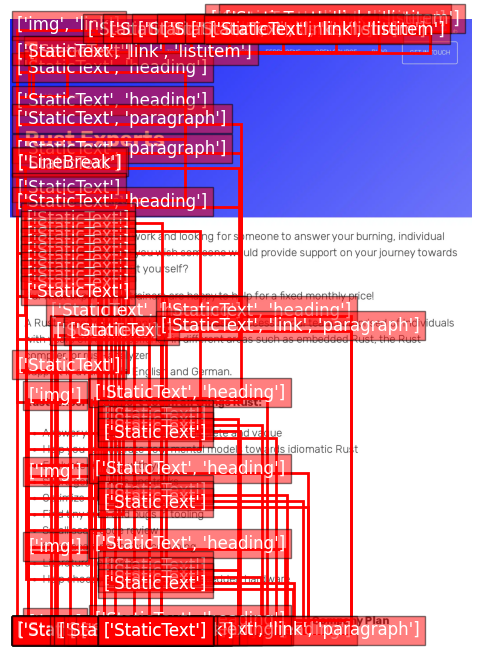

In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Device scale mapping
DEVICE_SCALE = {
    "default": 1,
    "iPad-Mini": 2, 
    "iPad-Pro": 2,
    "iPhone-13 Pro": 3,
    "iPhone-SE": 3
}

def determine_device(device_key: str) -> tuple:
    """Determine the device and scale factor from the device key.
    
    Parameters
    ----------
    device_key : str
        The device key in format "device_resolution" (e.g. "default_1280-720")
        
    Returns
    -------
    tuple
        Device name and scale factor
    """
    # Extract device name (part before underscore)
    device_name = device_key.split('_')[0]
    
    # Get scale factor from mapping, default to 1 if device not found
    scale_factor = DEVICE_SCALE.get(device_name, 1)
    
    return device_name, scale_factor

def display_image_with_boxes(image, labels: list, boxes: list, device_key: str = "default_1280-720") -> None:
    """Display an image with labeled bounding boxes, scaled appropriately for device.

    Parameters
    ----------
    image : PIL.Image
        The PIL Image object to display
    labels : list
        A list of labels corresponding to the bounding boxes
    boxes : list
        A list of bounding boxes, where each box is represented as a tuple
        (x_min, y_min, width, height)
    device_key : str, optional
        The device key in format "device_resolution" (default: "default_1280-720")

    Returns
    -------
    None
    """
    # Create figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 8))
    
    # Determine device and scale factor
    device_name, scale_factor = determine_device(device_key)
    print(f"\nDetected device: {device_name} (scale factor: {scale_factor})")
    
    # Display the image
    ax.imshow(image)

    # Add scaled bounding boxes and labels
    for label, box in zip(labels, boxes):
        x_min, y_min, width, height = box
        
        # Scale coordinates
        x_min *= scale_factor
        y_min *= scale_factor
        width *= scale_factor  
        height *= scale_factor
        
        # Ensure coordinates are within image bounds
        x_min = min(max(0, x_min), image.size[0])
        y_min = min(max(0, y_min), image.size[1])
        width = min(width, image.size[0] - x_min)
        height = min(height, image.size[1] - y_min)
        
        # Create rectangle patch
        rect = patches.Rectangle((x_min, y_min), width, height, 
                               linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        
        # Add label text
        ax.text(x_min, y_min, label, color='white', fontsize=12,
                bbox=dict(facecolor='red', alpha=0.5))

    plt.axis('off')
    plt.show()

# Example usage: Display the first image and its corresponding labels and boxes
first_example = dataset['train'][40]
image = first_example['image']

labels = first_example['labels'] 
boxes = first_example['contentBoxes']

# Print features for this example
print("\nFeatures for this example:")
print("-" * 50)
for key, value in first_example.items():
    if key != 'image':
        print(f"{key}:")
        print(value)
        print()

# Assuming device key is available in the dataset, otherwise use default
device_key = first_example.get('device_key', 'default_1280-720')
display_image_with_boxes(image, labels, boxes, device_key)


image dimension:  (2048, 2732)
Device key:  default_1280-720 image ratio:  0.7496339677891655
Device name: default device_key:  default_1280-720
Device name: default, Scale factor: 1

Detected device: default (scale factor: 2)


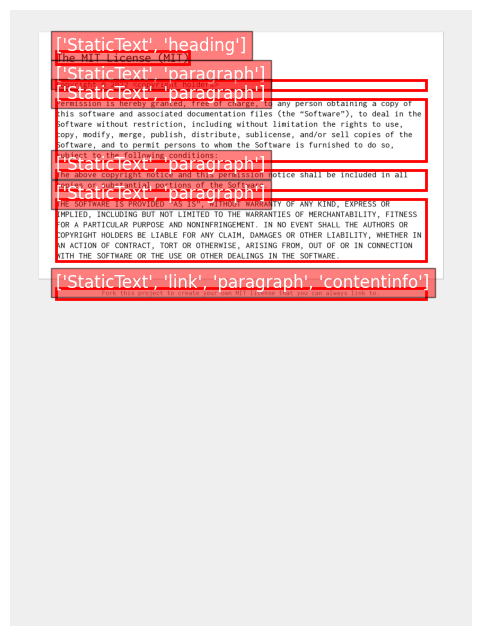

In [54]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Device scale mapping (matching WebUIPilotDataset)
DEVICE_SCALE = {
    "default": 1,
    "iPad-Mini": 2,
    "iPad-Pro": 2, 
    "iPhone-13": 3,
    "iPhone-SE": 3
}

def determine_device(device_key: str) -> tuple:
    """Determine the device and scale factor from the device key.
    
    Parameters
    ----------
    device_key : str
        The device key in format "device_resolution" (e.g. "default_1280-720")
        
    Returns
    -------
    tuple
        Device name and scale factor
    """
    # Extract device name from filename format
    device_name = "".join(device_key.split("_")[:-1])
    print(f"Device name: {device_name}" , "device_key: ", device_key)
    if not device_name:
        device_name = "default"
        
    # Get scale factor from mapping, default to 1 if device not found
    scale_factor = DEVICE_SCALE.get(device_name, 1)
    print(f"Device name: {device_name}, Scale factor: {scale_factor}")
    
    return device_name, 2#scale_factor

def display_image_with_boxes(image, labels: list, boxes: list, device_key: str = "default_1280-720") -> None:
    """Display an image with labeled bounding boxes, scaled appropriately for device.

    Parameters
    ----------
    image : PIL.Image
        The PIL Image object to display
    labels : list
        A list of labels corresponding to the bounding boxes
    boxes : list
        A list of bounding boxes, where each box is represented as a tuple
        (x1, y1, x2, y2) where (x1,y1) is top-left and (x2,y2) is bottom-right
    device_key : str, optional
        The device key in format "device_resolution" (default: "default_1280-720")

    Returns
    -------
    None
    """
    # Create figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 8))
    print("Device key: ", device_key, "image ratio: ", image.size[0]/image.size[1])
    # Determine device and scale factor
    device_name, scale_factor = determine_device(device_key)
    print(f"\nDetected device: {device_name} (scale factor: {scale_factor})")
    
    # Display the image
    ax.imshow(image)

    # Add scaled bounding boxes and labels
    for label, box in zip(labels, boxes):
        x1, y1, x2, y2 = box
        
        # Scale coordinates
        x1 *= scale_factor
        y1 *= scale_factor
        x2 *= scale_factor
        y2 *= scale_factor
        
        # Calculate width and height
        width = x2 - x1
        height = y2 - y1
        
        # Ensure coordinates are within image bounds
        x1 = min(max(0, x1), image.size[0])
        y1 = min(max(0, y1), image.size[1])
        width = min(width, image.size[0] - x1)
        height = min(height, image.size[1] - y1)
        
        # Create rectangle patch
        rect = patches.Rectangle((x1, y1), width, height,
                               linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        
        # Add label text
        ax.text(x1, y1, label, color='white', fontsize=12,
                bbox=dict(facecolor='red', alpha=0.5))

    plt.axis('off')
    plt.show()

# Example usage: Display the first image and its corresponding labels and boxes
first_example = dataset['train'][4]
image = first_example['image']


labels = first_example['labels'] 
boxes = first_example['contentBoxes']

# # Print features for this example
# print("\nFeatures for this example:")
# print("-" * 50)
# for key, value in first_example.items():
#     if key != 'image':
#         print(f"{key}:")
#         print(value)
#         print()

print("image dimension: ", image.size)

# Assuming device key is available in the dataset, otherwise use default
device_key = first_example.get('device_key', 'default_1280-720')
display_image_with_boxes(image, labels, boxes, device_key)



Features for this example:
--------------------------------------------------
labels:
[['img'], ['Section'], ['StaticText'], ['StaticText'], ['StaticText'], ['StaticText', 'paragraph'], ['StaticText', 'link'], ['StaticText', 'link'], ['StaticText'], ['StaticText', 'heading'], ['StaticText', 'heading'], ['StaticText', 'paragraph'], ['Iframe'], ['StaticText', 'paragraph'], ['StaticText'], ['StaticText', 'link', 'paragraph'], ['radio'], ['radio'], ['link'], ['StaticText', 'link', 'listitem'], ['StaticText', 'link', 'listitem'], ['StaticText', 'link', 'listitem'], ['StaticText', 'link', 'listitem'], ['StaticText', 'paragraph'], ['StaticText', 'heading'], ['StaticText', 'heading'], ['StaticText', 'heading'], ['StaticText', 'link', 'listitem'], ['StaticText', 'link', 'listitem'], ['StaticText', 'link', 'listitem'], ['StaticText', 'link', 'listitem'], ['StaticText', 'link', 'listitem'], ['StaticText', 'link', 'listitem'], ['StaticText', 'link', 'listitem'], ['StaticText', 'link', 'listitem']

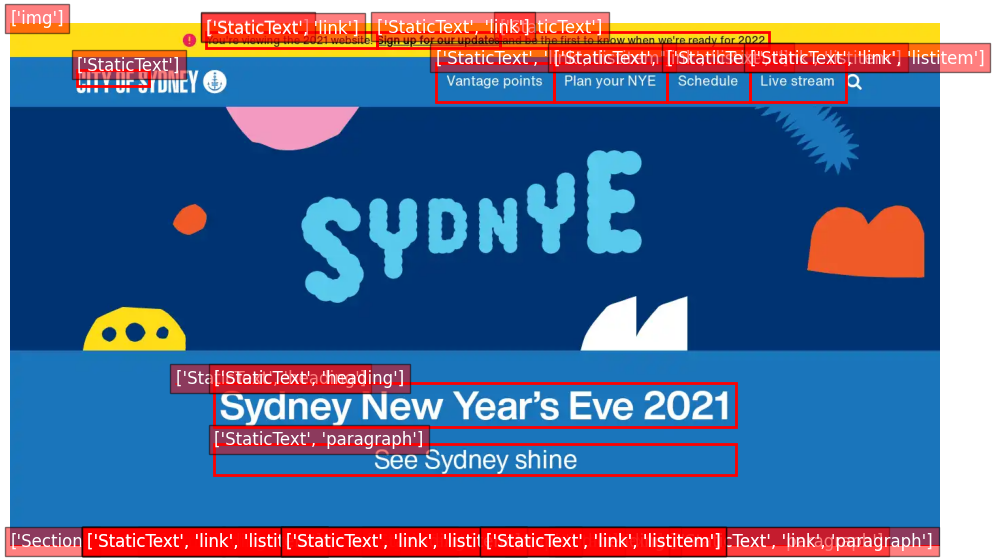

In [63]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Device resolution and scale mapping
DEVICE_INFO = {
    "default": {
        "scale": 1,
        "resolution": (1280, 720),  # Default 720p
        "aspect_ratio": 16/9
    },
    "iPad-Mini": {
        "scale": 2, 
        "resolution": (1488, 2266),  # Physical resolution
        "aspect_ratio": 2/3
    },
    "iPad-Pro": {
        "scale": 2,
        "resolution": (2048, 2732),  # Physical resolution
        "aspect_ratio": 3/4
    },
    "iPhone-13": {
        "scale": 3,
        "resolution": (1170, 2532),  # Physical resolution
        "aspect_ratio": 9/21
    },
    "iPhone-SE": {
        "scale": 3,
        "resolution": (750, 1334),  # Physical resolution
        "aspect_ratio": 9/16
    }
}

def determine_device(device_key: str, image_size: tuple) -> tuple:
    """Determine the device and scale factor based on image resolution.
    
    Parameters
    ----------
    device_key : str
        The device key (for printing purposes)
    image_size : tuple
        The actual image dimensions (width, height)
        
    Returns
    -------
    tuple
        Device name and scale factor
    """
    width, height = image_size
    
    # Find closest matching device based on resolution
    closest_device = "default"
    min_resolution_diff = float('inf')
    
    for device, info in DEVICE_INFO.items():
        device_width, device_height = info["resolution"]
        # Calculate Euclidean distance between resolutions
        resolution_diff = ((width - device_width)**2 + (height - device_height)**2)**0.5
        
        if resolution_diff < min_resolution_diff:
            min_resolution_diff = resolution_diff
            closest_device = device
            
    scale_factor = DEVICE_INFO[closest_device]["scale"]
    print(f"Device key from dataset: {device_key}")
    print(f"Image resolution: {width}x{height}")
    print(f"Matched device: {closest_device} (resolution: {DEVICE_INFO[closest_device]['resolution'][0]}x{DEVICE_INFO[closest_device]['resolution'][1]})")
    
    return closest_device, scale_factor

def display_image_with_boxes(image, labels: list, boxes: list, device_key: str = "default_1280-720") -> None:
    """Display an image with labeled bounding boxes, scaled appropriately for device.

    Parameters
    ----------
    image : PIL.Image
        The PIL Image object to display
    labels : list
        A list of labels corresponding to the bounding boxes
    boxes : list
        A list of bounding boxes, where each box is represented as a tuple
        (x1, y1, x2, y2) where (x1,y1) is top-left and (x2,y2) is bottom-right
    device_key : str, optional
        The device key in format "device_resolution" (default: "default_1280-720")

    Returns
    -------
    None
    """
    # Create figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 8))
    print("Image aspect ratio: ", image.size[0]/image.size[1])
    
    # Determine device and scale factor based on actual image size
    device_name, scale_factor = determine_device(device_key, image.size)
    print(f"\nDetected device: {device_name} (scale factor: {scale_factor})")
    
    # Display the image
    ax.imshow(image)

    # Add scaled bounding boxes and labels
    for label, box in zip(labels, boxes):
        x1, y1, x2, y2 = box
        
        # Scale coordinates
        x1 *= scale_factor
        y1 *= scale_factor
        x2 *= scale_factor
        y2 *= scale_factor
        
        # Calculate width and height
        width = x2 - x1
        height = y2 - y1
        
        # Ensure coordinates are within image bounds
        x1 = min(max(0, x1), image.size[0])
        y1 = min(max(0, y1), image.size[1])
        width = min(width, image.size[0] - x1)
        height = min(height, image.size[1] - y1)
        
        # Create rectangle patch
        rect = patches.Rectangle((x1, y1), width, height,
                               linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        
        # Add label text
        ax.text(x1, y1, label, color='white', fontsize=12,
                bbox=dict(facecolor='red', alpha=0.5))

    plt.axis('off')
    plt.show()

# Example usage: Display the first image and its corresponding labels and boxes
first_example = dataset['train'][151]
image = first_example['image']


labels = first_example['labels'] 
boxes = first_example['contentBoxes']

# Print features for this example
print("\nFeatures for this example:")
print("-" * 50)
for key, value in first_example.items():
    if key != 'image':
        print(f"{key}:")
        print(value)
        print()

print("image dimension: ", image.size)

# Assuming device key is available in the dataset, otherwise use default
device_key = first_example.get('device_key', 'default_1280-720')
display_image_with_boxes(image, labels, boxes, device_key)



Features for this example:
--------------------------------------------------
labels:
[['StaticText', 'heading'], ['StaticText'], ['StaticText', 'heading'], ['StaticText', 'paragraph'], ['StaticText', 'heading'], ['StaticText'], ['StaticText'], ['StaticText'], ['StaticText', 'link'], ['StaticText', 'link'], ['StaticText', 'link']]

contentBoxes:
[[463.0, 445.0, 1073.0, 475.0], [574.0, 340.0, 822.0, 364.0], [463.0, 515.0, 1073.0, 537.0], [463.0, 540.0, 1073.0, 562.0], [463.0, 594.0, 1073.0, 616.0], [463.0, 620.0, 520.0, 639.0], [571.0, 620.0, 763.0, 639.0], [889.0, 620.0, 894.0, 639.0], [520.0, 620.0, 571.0, 639.0], [763.0, 620.0, 889.0, 639.0], [463.0, 340.0, 574.0, 364.0]]

paddingBoxes:
[[463.0, 445.0, 1073.0, 493.0], [574.0, 340.0, 822.0, 364.0], [463.0, 515.0, 1073.0, 537.0], [463.0, 540.0, 1073.0, 562.0], [463.0, 594.0, 1073.0, 616.0], [463.0, 620.0, 520.0, 639.0], [571.0, 620.0, 763.0, 639.0], [889.0, 620.0, 894.0, 639.0], [520.0, 620.0, 571.0, 639.0], [763.0, 620.0, 889.0, 639.

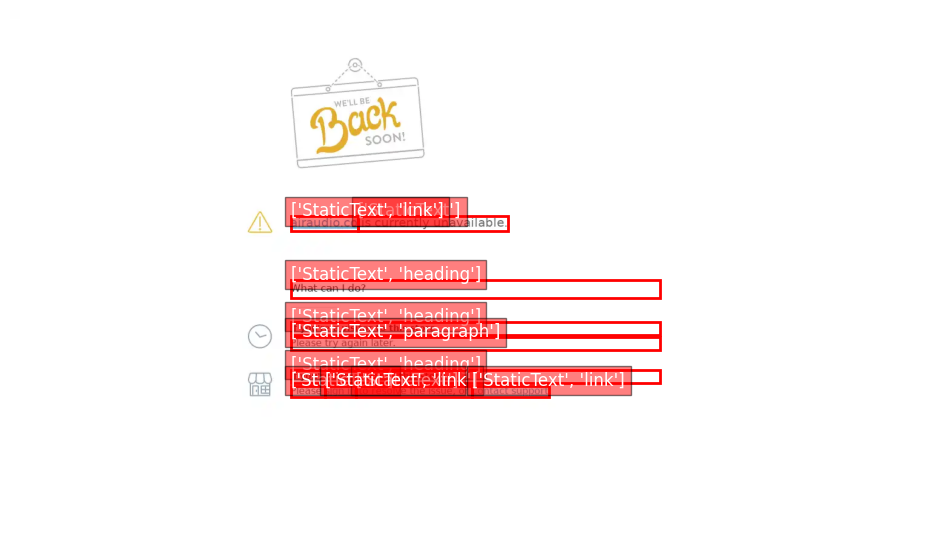

In [67]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Device resolution and scale mapping
DEVICE_INFO = {
    "default": {
        "scale": 1,
        "resolution": (1280, 720),  # Default 720p
        "aspect_ratio": 16/9
    },
    "iPad-Mini": {
        "scale": 2, 
        "resolution": (1488, 2266),  # Physical resolution
        "aspect_ratio": 2/3
    },
    "iPad-Pro": {
        "scale": 2,
        "resolution": (2048, 2732),  # Physical resolution
        "aspect_ratio": 3/4
    },
    "iPhone-13": {
        "scale": 3,
        "resolution": (1170, 2532),  # Physical resolution
        "aspect_ratio": 9/21
    },
    "iPhone-SE": {
        "scale": 3,
        "resolution": (750, 1334),  # Physical resolution
        "aspect_ratio": 9/16
    }
}

def determine_device(device_key: str, image_size: tuple) -> tuple:
    """Determine the device and scale factor based on image resolution.
    
    Parameters
    ----------
    device_key : str
        The device key (for printing purposes)
    image_size : tuple
        The actual image dimensions (width, height)
        
    Returns
    -------
    tuple
        Device name and scale factor
    """
    width, height = image_size
    
    # Find closest matching device based on resolution
    closest_device = "default"
    min_resolution_diff = float('inf')
    
    for device, info in DEVICE_INFO.items():
        device_width, device_height = info["resolution"]
        # Calculate Euclidean distance between resolutions
        resolution_diff = ((width - device_width)**2 + (height - device_height)**2)**0.5
        
        if resolution_diff < min_resolution_diff:
            min_resolution_diff = resolution_diff
            closest_device = device
            
    scale_factor = DEVICE_INFO[closest_device]["scale"]
    print(f"Device key from dataset: {device_key}")
    print(f"Image resolution: {width}x{height}")
    print(f"Matched device: {closest_device} (resolution: {DEVICE_INFO[closest_device]['resolution'][0]}x{DEVICE_INFO[closest_device]['resolution'][1]})")
    
    return closest_device, scale_factor

def is_valid_box(box: tuple, image_size: tuple, min_size: int = 10) -> bool:
    """Check if a bounding box is valid.
    
    Parameters
    ----------
    box : tuple
        Box coordinates (x1, y1, x2, y2)
    image_size : tuple
        Image dimensions (width, height) 
    min_size : int
        Minimum pixel distance between points
        
    Returns
    -------
    bool
        True if box is valid, False otherwise
    """
    x1, y1, x2, y2 = box
    width, height = image_size
    
    # Check if box is too small
    if abs(x2 - x1) < min_size or abs(y2 - y1) < min_size:
        return False
        
    # Check if box is out of bounds
    if x1 < 0 or y1 < 0 or x2 > width or y2 > height:
        return False
        
    return True

def display_image_with_boxes(image, labels: list, boxes: list, device_key: str = "default_1280-720") -> None:
    """Display an image with labeled bounding boxes, scaled appropriately for device.

    Parameters
    ----------
    image : PIL.Image
        The PIL Image object to display
    labels : list
        A list of labels corresponding to the bounding boxes
    boxes : list
        A list of bounding boxes, where each box is represented as a tuple
        (x1, y1, x2, y2) where (x1,y1) is top-left and (x2,y2) is bottom-right
    device_key : str, optional
        The device key in format "device_resolution" (default: "default_1280-720")

    Returns
    -------
    None
    """
    # Create figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 8))
    print("Image aspect ratio: ", image.size[0]/image.size[1])
    
    # Determine device and scale factor based on actual image size
    device_name, scale_factor = determine_device(device_key, image.size)
    print(f"\nDetected device: {device_name} (scale factor: {scale_factor})")
    
    # Display the image
    ax.imshow(image)

    # Add scaled bounding boxes and labels
    for label, box in zip(labels, boxes):
        x1, y1, x2, y2 = box
        
        # Scale coordinates
        x1 *= scale_factor
        y1 *= scale_factor
        x2 *= scale_factor
        y2 *= scale_factor
        
        # Skip invalid boxes
        if not is_valid_box((x1, y1, x2, y2), image.size):
            continue
            
        # Calculate width and height
        width = x2 - x1
        height = y2 - y1
        
        # Ensure coordinates are within image bounds
        x1 = min(max(0, x1), image.size[0])
        y1 = min(max(0, y1), image.size[1])
        width = min(width, image.size[0] - x1)
        height = min(height, image.size[1] - y1)
        
        # Create rectangle patch
        rect = patches.Rectangle((x1, y1), width, height,
                               linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        
        # Add label text
        ax.text(x1, y1, label, color='white', fontsize=12,
                bbox=dict(facecolor='red', alpha=0.5))

    plt.axis('off')
    plt.show()

# Example usage: Display the first image and its corresponding labels and boxes
first_example = dataset['train'][32]
image = first_example['image']


labels = first_example['labels'] 
boxes = first_example['contentBoxes']

# Print features for this example
print("\nFeatures for this example:")
print("-" * 50)
for key, value in first_example.items():
    if key != 'image':
        print(f"{key}:")
        print(value)
        print()

print("image dimension: ", image.size)

# Assuming device key is available in the dataset, otherwise use default
device_key = first_example.get('device_key', 'default_1280-720')
display_image_with_boxes(image, labels, boxes, device_key)


In [37]:
from datasets import load_dataset

# Get value counts of key_name column
key_name_counts = dataset['train'].to_pandas()['key_name'].value_counts()

print("Value counts for key_name:")
print("-" * 50)
print(key_name_counts)

Value counts for key_name:
--------------------------------------------------
key_name
default_1280-720     6402
default_1366-768     6402
default_1536-864     6402
default_1920-1080    6402
iPhone-13 Pro        6402
iPad-Pro             6401
Name: count, dtype: int64


In [38]:
Value counts for key_name:
--------------------------------------------------
key_name
default_1280-720     6402
default_1366-768     6402
default_1536-864     6402
default_1920-1080    6402
iPhone-13 Pro        6402
iPad-Pro             6401
Name: count, dtype: int64


Device	Scale Factor	Logical Resolution	Physical Resolution	Aspect Ratio
Default	1	N/A	N/A	N/A
iPad Mini	2	744 × 1133	1488 × 2266	~2:3
iPad Pro	2	1024 × 1366	2048 × 2732	3:4
iPhone 13 Pro	3	390 × 844	1170 × 2532	9:21
iPhone SE	3	375 × 667	750 × 1334	9:16

SyntaxError: invalid syntax (4159445904.py, line 1)

In [ ]:
Value counts for key_name:
--------------------------------------------------
key_name
default_1280-720     6402
default_1366-768     6402
default_1536-864     6402
default_1920-1080    6402
iPhone-13 Pro        6402
iPad-Pro             6401
Name: count, dtype: int64


Device	Scale Factor	Logical Resolution	Physical Resolution	Aspect Ratio
Default	1	N/A	N/A	N/A
iPad Mini	2	744 × 1133	1488 × 2266	~2:3
iPad Pro	2	1024 × 1366	2048 × 2732	3:4
iPhone 13 Pro	3	390 × 844	1170 × 2532	9:21
iPhone SE	3	375 × 667	750 × 1334	9:16

In [39]:
DEVICE_SCALE = {
    "default": 1,
    "iPad-Mini": 2,
    "iPad-Pro": 2, 
    "iPhone-13": 3,
    "iPhone-SE": 3
}


Device	Scale Factor	Logical Resolution	Physical Resolution	Aspect Ratio
Default	1	N/A	N/A	N/A
iPad Mini	2	744 × 1133	1488 × 2266	~2:3
iPad Pro	2	1024 × 1366	2048 × 2732	3:4
iPhone 13 Pro	3	390 × 844	1170 × 2532	9:21
iPhone SE	3	375 × 667	750 × 1334	9:16

SyntaxError: invalid character '×' (U+00D7) (3146456027.py, line 12)

# 02-02 Try to convert the dataset to the format of the yolo required structure

In [1]:
from datasets import load_dataset

dataset = load_dataset("biglab/webui-7kbal-elements")

print(dataset)

# DatasetDict({
#     train: Dataset({
#         features: ['image', 'labels', 'contentBoxes', 'paddingBoxes', 'borderBoxes', 'marginBoxes', 'key_name'],
#         num_rows: 38411
#     })
# })

DatasetDict({
    train: Dataset({
        features: ['image', 'labels', 'contentBoxes', 'paddingBoxes', 'borderBoxes', 'marginBoxes', 'key_name'],
        num_rows: 38411
    })
})


image dimension:  (2048, 2732)
Image aspect ratio:  0.7496339677891655
Device key from dataset: default_1280-720
Image resolution: 2048x2732
Matched device: iPad-Pro (resolution: 2048x2732)

Detected device: iPad-Pro (scale factor: 2)


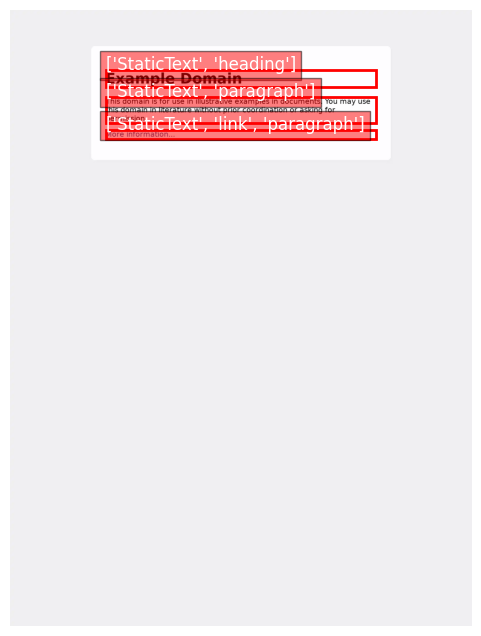

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Device resolution and scale mapping
DEVICE_INFO = {
    "default": {
        "scale": 1,
        "resolution": (1280, 720),  # Default 720p
        "aspect_ratio": 16/9
    },
    "iPad-Mini": {
        "scale": 2, 
        "resolution": (1488, 2266),  # Physical resolution
        "aspect_ratio": 2/3
    },
    "iPad-Pro": {
        "scale": 2,
        "resolution": (2048, 2732),  # Physical resolution
        "aspect_ratio": 3/4
    },
    "iPhone-13": {
        "scale": 3,
        "resolution": (1170, 2532),  # Physical resolution
        "aspect_ratio": 9/21
    },
    "iPhone-SE": {
        "scale": 3,
        "resolution": (750, 1334),  # Physical resolution
        "aspect_ratio": 9/16
    }
}

def determine_device(device_key: str, image_size: tuple) -> tuple:
    """Determine the device and scale factor based on image resolution.
    
    Parameters
    ----------
    device_key : str
        The device key (for printing purposes)
    image_size : tuple
        The actual image dimensions (width, height)
        
    Returns
    -------
    tuple
        Device name and scale factor
    """
    width, height = image_size
    
    # Find closest matching device based on resolution
    closest_device = "default"
    min_resolution_diff = float('inf')
    
    for device, info in DEVICE_INFO.items():
        device_width, device_height = info["resolution"]
        # Calculate Euclidean distance between resolutions
        resolution_diff = ((width - device_width)**2 + (height - device_height)**2)**0.5
        
        if resolution_diff < min_resolution_diff:
            min_resolution_diff = resolution_diff
            closest_device = device
            
    scale_factor = DEVICE_INFO[closest_device]["scale"]
    print(f"Device key from dataset: {device_key}")
    print(f"Image resolution: {width}x{height}")
    print(f"Matched device: {closest_device} (resolution: {DEVICE_INFO[closest_device]['resolution'][0]}x{DEVICE_INFO[closest_device]['resolution'][1]})")
    
    return closest_device, scale_factor

def is_valid_box(box: tuple, image_size: tuple, min_size: int = 10) -> bool:
    """Check if a bounding box is valid.
    
    Parameters
    ----------
    box : tuple
        Box coordinates (x1, y1, x2, y2)
    image_size : tuple
        Image dimensions (width, height) 
    min_size : int
        Minimum pixel distance between points
        
    Returns
    -------
    bool
        True if box is valid, False otherwise
    """
    x1, y1, x2, y2 = box
    width, height = image_size
    
    # Check if box is too small
    if abs(x2 - x1) < min_size or abs(y2 - y1) < min_size:
        return False
        
    # Check if box is out of bounds
    if x1 < 0 or y1 < 0 or x2 > width or y2 > height:
        return False
        
    return True

def display_image_with_boxes(image, labels: list, boxes: list, device_key: str = "default_1280-720") -> None:
    """Display an image with labeled bounding boxes, scaled appropriately for device.

    Parameters
    ----------
    image : PIL.Image
        The PIL Image object to display
    labels : list
        A list of labels corresponding to the bounding boxes
    boxes : list
        A list of bounding boxes, where each box is represented as a tuple
        (x1, y1, x2, y2) where (x1,y1) is top-left and (x2,y2) is bottom-right
    device_key : str, optional
        The device key in format "device_resolution" (default: "default_1280-720")

    Returns
    -------
    None
    """
    # Create figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 8))
    print("Image aspect ratio: ", image.size[0]/image.size[1])
    
    # Determine device and scale factor based on actual image size
    device_name, scale_factor = determine_device(device_key, image.size)
    print(f"\nDetected device: {device_name} (scale factor: {scale_factor})")
    
    # Display the image
    ax.imshow(image)

    # Add scaled bounding boxes and labels
    for label, box in zip(labels, boxes):
        x1, y1, x2, y2 = box
        
        # Scale coordinates
        x1 *= scale_factor
        y1 *= scale_factor
        x2 *= scale_factor
        y2 *= scale_factor
        
        # Skip invalid boxes
        if not is_valid_box((x1, y1, x2, y2), image.size):
            continue
            
        # Calculate width and height
        width = x2 - x1
        height = y2 - y1
        
        # Ensure coordinates are within image bounds
        x1 = min(max(0, x1), image.size[0])
        y1 = min(max(0, y1), image.size[1])
        width = min(width, image.size[0] - x1)
        height = min(height, image.size[1] - y1)
        
        # Create rectangle patch
        rect = patches.Rectangle((x1, y1), width, height,
                               linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        
        # Add label text
        ax.text(x1, y1, label, color='white', fontsize=12,
                bbox=dict(facecolor='red', alpha=0.5))

    plt.axis('off')
    plt.show()

# Example usage: Display the first image and its corresponding labels and boxes
first_example = dataset['train'][82]
image = first_example['image']


labels = first_example['labels'] 
boxes = first_example['contentBoxes']

# Print features for this example
# print("\nFeatures for this example:")
# print("-" * 50)
# for key, value in first_example.items():
#     if key != 'image':
#         print(f"{key}:")
#         print(value)
#         print()

print("image dimension: ", image.size)

# Assuming device key is available in the dataset, otherwise use default
device_key = first_example.get('device_key', 'default_1280-720')
display_image_with_boxes(image, labels, boxes, device_key)


Todo : 
- verify the required structure of the dataset
- convert the dataset to the required structure
- save the dataset to the required structure



first we are required to verify the lables 

In [7]:
import pandas as pd
import random
import numpy as np

# Get 10% of the dataset randomly
dataset_size = len(dataset['train'])
sample_size = int(dataset_size * 0.1)
sampled_indices = random.sample(range(dataset_size), sample_size)

# Get value counts of labels using list comprehension and numpy concatenate
label_counts = pd.Series(
    np.concatenate([dataset['train'][idx]['labels'] for idx in sampled_indices])
).value_counts()

print(f"Value counts for labels (from {sample_size} samples, {sample_size/dataset_size:.1%} of data):")
print("-" * 50)
print(label_counts)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (22,) + inhomogeneous part.

In [8]:
# Todo : 
# - verify the required structure of the dataset
# - convert the dataset to the required structure
# - save the dataset to the required structure

import logging
import os
import yaml
from pathlib import Path
from sklearn.model_selection import train_test_split

logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)



def create_compound_label(label_list):
    """Create a compound label from a list of labels.
    
    Parameters
    ----------
    label_list : list
        List of labels
        
    Returns
    -------
    str
        Concatenated label with underscore separator, using up to 3 labels
    """
    # Take up to first 3 labels and join them with underscore
    return '_'.join(label_list[:3]) if label_list else 'Unknown'

def create_yolo_dataset(
    output_dir: str = "Data/3_WebUI_7k/yolo_dataset",
    train_ratio: float = 0.8,
    val_ratio: float = 0.1,
    test_ratio: float = 0.1
):
    """Create YOLO format dataset from WebUI dataset.
    
    Parameters
    ----------
    output_dir : str
        Output directory for YOLO dataset
    train_ratio : float
        Ratio of training data
    val_ratio : float
        Ratio of validation data
    test_ratio : float
        Ratio of test data
    """
    # Load dataset
    logger.info("Loading dataset...")
    dataset = load_dataset("biglab/webui-7kbal-elements")
    
    # Create directory structure
    output_path = Path(output_dir)
    for split in ['train', 'val', 'test']:
        (output_path / split / 'images').mkdir(parents=True, exist_ok=True)
        (output_path / split / 'labels').mkdir(parents=True, exist_ok=True)
    
    # Get unique compound labels and create class mapping
    all_labels = set()
    for example in dataset['train']:
        for label_list in example['labels']:
            compound_label = create_compound_label(label_list)
            all_labels.add(compound_label)
    
    class_mapping = {label: idx for idx, label in enumerate(sorted(all_labels))}
    
    logger.info(f"Found {len(class_mapping)} unique compound labels")
    for label, idx in class_mapping.items():
        logger.info(f"Class {idx}: {label}")
    
    # Create splits
    indices = list(range(len(dataset['train'])))
    train_val_indices, test_indices = train_test_split(
        indices, 
        test_size=test_ratio, 
        random_state=42
    )
    
    train_indices, val_indices = train_test_split(
        train_val_indices,
        test_size=val_ratio/(train_ratio + val_ratio),
        random_state=42
    )
    
    splits = {
        'train': train_indices,
        'val': val_indices,
        'test': test_indices
    }
    
    # Process dataset
    for split_name, split_indices in splits.items():
        logger.info(f"Processing {split_name} split...")
        
        for idx in split_indices:
            example = dataset['train'][idx]
            image = example['image']
            
            # Save image
            image_filename = f"{idx:06d}.jpg"
            image_path = output_path / split_name / 'images' / image_filename
            image.save(image_path)
            
            # Create YOLO format annotations
            label_path = output_path / split_name / 'labels' / f"{idx:06d}.txt"
            
            with open(label_path, 'w') as f:
                for label_list, box in zip(example['labels'], example['contentBoxes']):
                    if not label_list:
                        continue
                        
                    compound_label = create_compound_label(label_list)
                    class_id = class_mapping[compound_label]
                    
                    yolo_box = convert_box_to_yolo_format(
                        box, 
                        image.width, 
                        image.height
                    )
                    
                    # Write YOLO format line
                    f.write(f"{class_id} {' '.join(map(str, yolo_box))}\n")
    
    # Create dataset.yaml
    yaml_content = {
        'path': os.path.abspath(output_dir),
        'train': 'train/images',
        'val': 'val/images',
        'test': 'test/images',
        'names': {v: k for k, v in class_mapping.items()}
    }
    
    with open(output_path / 'dataset.yaml', 'w') as f:
        yaml.dump(yaml_content, f, sort_keys=False)
    
    logger.info(f"Dataset created successfully at {output_dir}")
    logger.info(f"Number of compound classes: {len(class_mapping)}")
    
    # Save class mapping to a separate file for reference
    with open(output_path / 'class_mapping.txt', 'w') as f:
        for label, idx in class_mapping.items():
            f.write(f"{idx}: {label}\n")
    
    logger.info(f"Class mapping saved to {output_path}/class_mapping.txt")

if __name__ == "__main__":
    create_yolo_dataset()

KeyboardInterrupt: 

In [ ]:
create_yolo_dataset(
    output_dir="Data/3_WebUI_7k/yolo_dataset",
    train_ratio=0.7,
    val_ratio=0.1,
    test_ratio=0.2
)